CODE BLOCK: 1


In [1]:
# # Install any required libraries not present in your working environment

# # Needed locally and in colab
# !pip install torchsummary

# # Needed locally
# !conda install -c conda-forge tqdm

In [2]:
# Import necessary modules (external libs)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torchvision import datasets, transforms

In [3]:
# Import user defined modules
from model import Net, plot_train_test_metrics, test, train
from utils import get_device, plot_sample_training_images

CODE BLOCK: 2


In [4]:
# Functionality to check cuda support and create device is now moved to utils.py
device_support, device = get_device()
print(f"Device created with {device_support}!")

Device created with cuda!


CODE BLOCK: 3


In [5]:
# Train and test data transformation steps now moved to apply_mnist_image_transformations()

def apply_mnist_image_transformations():
    """
    Function to apply the required transformations to the MNIST dataset.
    """
    # Apply the required transformations to the MNIST dataset
    train_transforms = transforms.Compose(
        [
            # Randomly center crop the images to 22x22 and then resize to 28x28
            transforms.RandomApply(
                [
                    transforms.CenterCrop(22),
                ],
                p=0.1,
            ),
            transforms.Resize((28, 28)),
            # Apply random rotation to the images
            transforms.RandomRotation((-15.0, 15.0), fill=0),
            # Convert the images to tensors
            # normalize the images with mean and standard deviation from the whole dataset
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
        ]
    )

    # Test data transformations
    test_transforms = transforms.Compose(
        # Convert the images to tensors
        # normalize the images with mean and standard deviation from the whole dataset
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )

    return train_transforms, test_transforms


train_transforms, test_transforms = apply_mnist_image_transformations()

CODE BLOCK: 4


In [6]:
data_path = "../data"
print(f"Train and test data path: {data_path}")

# Download MNIST dataset and apply transformations
train_data = datasets.MNIST(
    data_path, train=True, download=True, transform=train_transforms
)
test_data = datasets.MNIST(
    data_path, train=False, download=True, transform=test_transforms
)

Train and test data path: ../data


CODE BLOCK: 5


In [7]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

# Load train and test data using DataLoader
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6


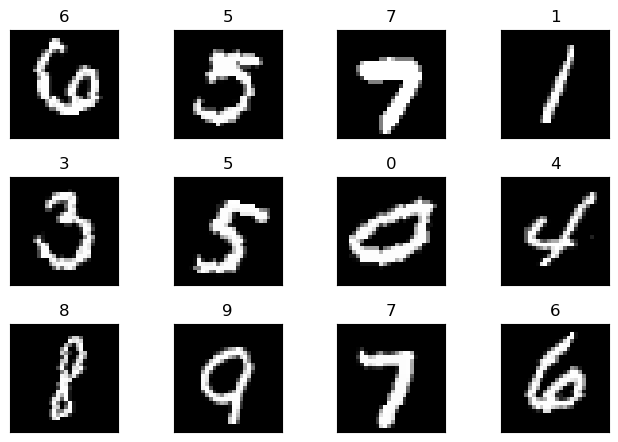

In [8]:
# Get a batch of training data from train_loader
batch_data, batch_label = next(iter(train_loader))

# Plot 12 sample images from the training data along with their labels
# plot_sample_training_images() imported from utils.py
fig = plot_sample_training_images(batch_data, batch_label)
plt.show()

CODE BLOCK: 7


In [9]:
# Net class is imported from model.py

In [10]:
# Send the model to device
model = Net().to(device)
# Print the model summary by specifying the input size
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8


In [11]:
# List to hold losses and accuracy for test and train moved to utils.py

CODE BLOCK: 9


In [12]:
# Function definitions for get_correct_prediction_count() is now imported from moved to utils.py
# Function definitions for train() and test() is now imported from moved to model.py

CODE BLOCK: 10


In [13]:
# Create optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# Specify the loss function
criterion = nn.CrossEntropyLoss()
# Specify the number of epochs
num_epochs = 20

for epoch in range(1, num_epochs + 1):
    if epoch == 1:
        print(f"\n\nBatch size: {batch_size}, Total epochs: {num_epochs}\n\n")

    # Print the current epoch
    print(f"Epoch {epoch}")
    # Train the model
    train(model, device, train_loader, optimizer, criterion)
    # Test the model
    test(model, device, test_loader, criterion)
    scheduler.step()
    # Line break before next epoch
    print("\n")

Adjusting learning rate of group 0 to 1.0000e-02.


Batch size: 512, Total epochs: 20


Epoch 1


Train: Loss=0.1832 Batch_id=117 Accuracy=59.98: 100%|██████████| 118/118 [00:09<00:00, 12.68it/s]


Test set: Average loss: 0.0003, Accuracy: 9520/10000 (95.20%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 2


Train: Loss=0.1176 Batch_id=117 Accuracy=94.84: 100%|██████████| 118/118 [00:10<00:00, 11.74it/s]


Test set: Average loss: 0.0002, Accuracy: 9743/10000 (97.43%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 3


Train: Loss=0.0836 Batch_id=117 Accuracy=96.53: 100%|██████████| 118/118 [00:10<00:00, 11.60it/s]


Test set: Average loss: 0.0001, Accuracy: 9805/10000 (98.05%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 4


Train: Loss=0.1309 Batch_id=117 Accuracy=97.05: 100%|██████████| 118/118 [00:09<00:00, 11.95it/s]


Test set: Average loss: 0.0001, Accuracy: 9834/10000 (98.34%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 5


Train: Loss=0.0846 Batch_id=117 Accuracy=97.51: 100%|██████████| 118/118 [00:09<00:00, 12.04it/s]


Test set: Average loss: 0.0001, Accuracy: 9871/10000 (98.71%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 6


Train: Loss=0.0405 Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [00:10<00:00, 11.41it/s]


Test set: Average loss: 0.0001, Accuracy: 9877/10000 (98.77%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 7


Train: Loss=0.0303 Batch_id=117 Accuracy=98.13: 100%|██████████| 118/118 [00:09<00:00, 12.24it/s]


Test set: Average loss: 0.0001, Accuracy: 9876/10000 (98.76%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 8


Train: Loss=0.0346 Batch_id=117 Accuracy=98.25: 100%|██████████| 118/118 [00:09<00:00, 12.78it/s]


Test set: Average loss: 0.0001, Accuracy: 9892/10000 (98.92%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 9


Train: Loss=0.0302 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:10<00:00, 11.40it/s]


Test set: Average loss: 0.0001, Accuracy: 9887/10000 (98.87%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 10


Train: Loss=0.0717 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:09<00:00, 12.16it/s]


Test set: Average loss: 0.0001, Accuracy: 9901/10000 (99.01%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 11


Train: Loss=0.0552 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:09<00:00, 11.94it/s]


Test set: Average loss: 0.0001, Accuracy: 9843/10000 (98.43%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 12


Train: Loss=0.0440 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:10<00:00, 11.41it/s]


Test set: Average loss: 0.0001, Accuracy: 9891/10000 (98.91%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 13


Train: Loss=0.0105 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:10<00:00, 11.43it/s]


Test set: Average loss: 0.0001, Accuracy: 9907/10000 (99.07%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 14


Train: Loss=0.0204 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:09<00:00, 12.00it/s]


Test set: Average loss: 0.0001, Accuracy: 9905/10000 (99.05%)
Adjusting learning rate of group 0 to 1.0000e-02.


Epoch 15


Train: Loss=0.0293 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:10<00:00, 11.78it/s]


Test set: Average loss: 0.0000, Accuracy: 9915/10000 (99.15%)
Adjusting learning rate of group 0 to 1.0000e-03.


Epoch 16


Train: Loss=0.0489 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:09<00:00, 12.95it/s]


Test set: Average loss: 0.0000, Accuracy: 9926/10000 (99.26%)
Adjusting learning rate of group 0 to 1.0000e-03.


Epoch 17


Train: Loss=0.0098 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:09<00:00, 12.43it/s]


Test set: Average loss: 0.0000, Accuracy: 9921/10000 (99.21%)
Adjusting learning rate of group 0 to 1.0000e-03.


Epoch 18


Train: Loss=0.0049 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:09<00:00, 12.66it/s]


Test set: Average loss: 0.0000, Accuracy: 9923/10000 (99.23%)
Adjusting learning rate of group 0 to 1.0000e-03.


Epoch 19


Train: Loss=0.0086 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:09<00:00, 12.51it/s]


Test set: Average loss: 0.0000, Accuracy: 9920/10000 (99.20%)
Adjusting learning rate of group 0 to 1.0000e-03.


Epoch 20


Train: Loss=0.0064 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:09<00:00, 12.24it/s]


Test set: Average loss: 0.0000, Accuracy: 9923/10000 (99.23%)
Adjusting learning rate of group 0 to 1.0000e-03.




CODE BLOCK: 11


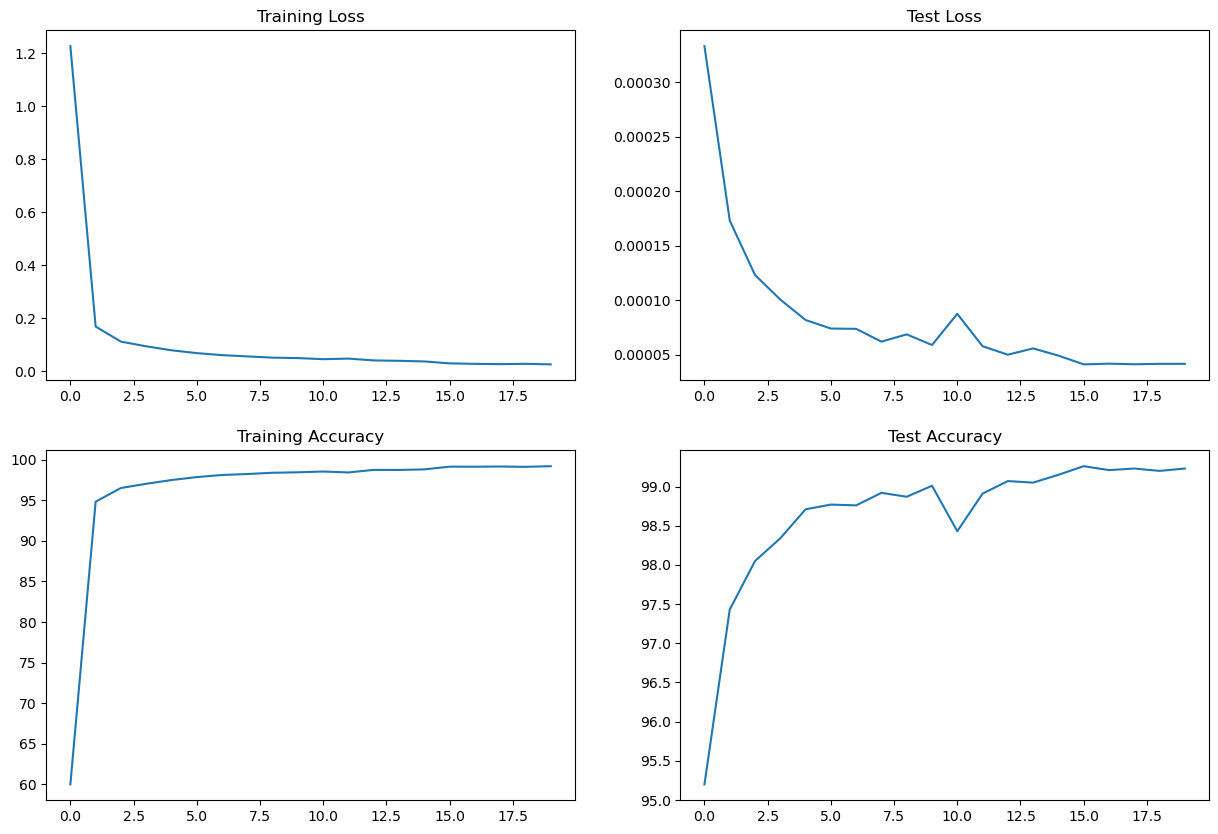

In [14]:
# Plot the accuracy and loss graphs using data and plot_train_test_metrics() from model.py
fig, axs = plot_train_test_metrics()
plt.show()